<a href="https://colab.research.google.com/github/imtoga/imtoga/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 1.0179 - val_loss: 0.5599
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6926 - val_loss: 0.4894
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4871 - val_loss: 0.4607
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4690 - val_loss: 0.4338
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4421 - val_loss: 0.4299
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4319 - val_loss: 0.4157
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4244 - val_loss: 0.4134
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4153 - val_loss: 0.4066
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4140 - val_loss: 0.4020
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4084 - val_loss: 0.3998

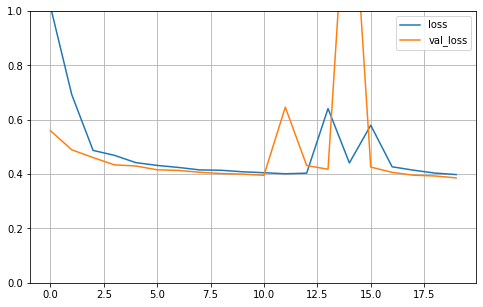

162/162 [==============================] - 0s 1ms/step - loss: 0.3899


In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
x_train_full, x_test , y_train_full, y_test = train_test_split(housing.data, housing.target)
x_train , x_valid , y_train , y_valid = train_test_split(x_train_full , y_train_full)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

model = keras.models.Sequential([
                                 keras.layers.Dense(30, activation="relu" , input_shape = x_train.shape[1:]),
                                 keras.layers.Dense(1)
])
model.compile(loss='mean_squared_error' , optimizer="sgd")
history = model.fit(x_train, y_train , epochs=20 , validation_data = (x_valid,y_valid))

import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()
se_test = model.evaluate(x_test, y_test)